In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Relative path from notebooks/data_load.ipynb to data/raw/FW_Veg_Rem_Combined.csv
df = pd.read_csv('../data/raw/FW_Veg_Rem_Combined.csv')

# Check it loaded correctly
df.head()


,Unnamed: 0.1,Unnamed: 0,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [20]:
vars_to_keep = [
    "fire_size",
    "fire_size_class",
    "latitude",
    "longitude",
    "discovery_month",
    "disc_pre_year",
    "Vegetation",
    "Temp_pre_30",
    "Temp_pre_15",
    "Temp_pre_7",
    "Wind_pre_30",
    "Wind_pre_15",
    "Wind_pre_7",
    "Hum_pre_30",
    "Hum_pre_15",
    "Hum_pre_7",
    "Prec_pre_30",
    "Prec_pre_15",
    "Prec_pre_7",
    "remoteness"
    ]
# Select only the columns we want to keep
df = df[vars_to_keep]
# Check the columns we kept
df.head()

,fire_size,fire_size_class,latitude,longitude,discovery_month,disc_pre_year,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness
0,10.0,C,18.105072,-66.753044,Feb,2007,12,24.480974,24.716923,24.902597,4.341807,3.492857,3.262092,78.216590,76.793750,76.381579,0.0,0.0,0.0,0.017923
1,3.0,B,35.038330,-87.610000,Dec,2006,15,7.553433,7.010000,0.343529,2.709764,2.881707,1.976471,70.840000,65.858911,55.505882,59.8,8.4,0.0,0.184355
2,60.0,C,34.947800,-88.722500,Feb,2004,16,4.971930,5.782766,5.558750,3.364499,2.923830,2.695833,75.531629,75.868613,76.812834,168.8,42.2,18.1,0.194544
3,1.0,B,39.641400,-119.308300,Jun,2005,0,16.275967,18.996181,18.142564,4.054982,3.398329,3.671282,44.778429,37.140811,35.353846,10.4,7.2,0.0,0.487447
4,2.0,B,30.700600,-90.591400,Sep,1999,12,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,0.214633


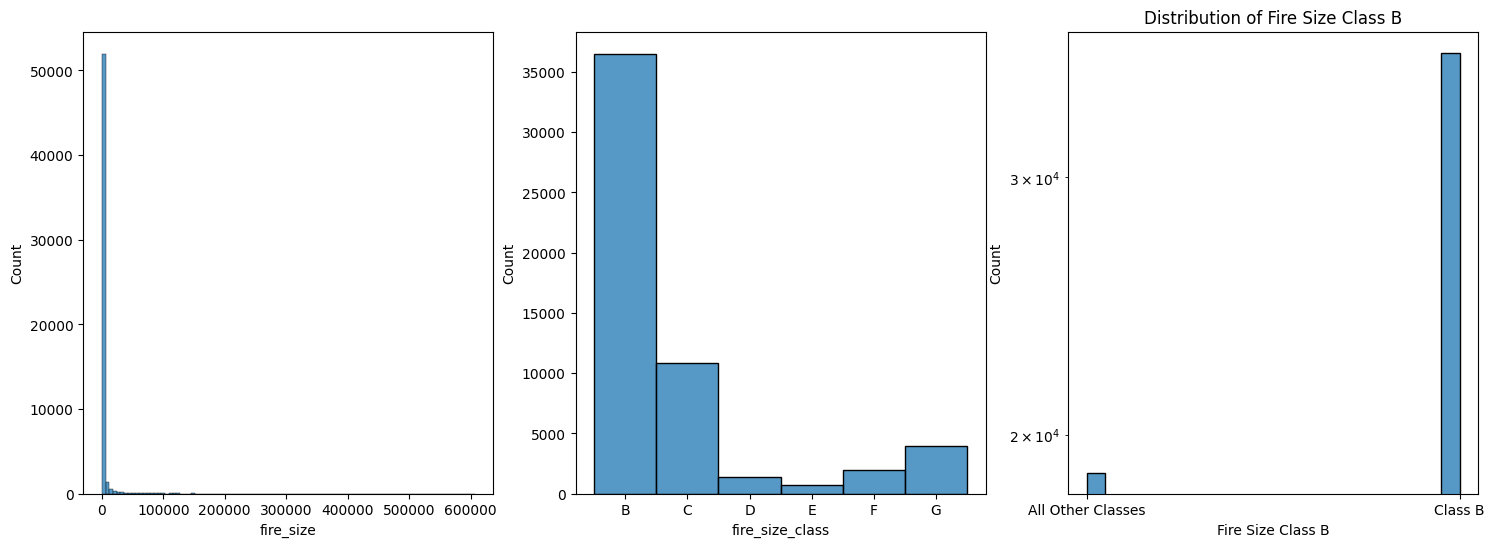

In [21]:
# Compare distribution of fire size classes with distribution of fire sizes
# order fire size classes variable alphabetically
df.fire_size_class = pd.Categorical(df.fire_size_class, ordered=True)

def plot_fire_dist_triple(df):
    # Three plots next to each other
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot the distribution of fire sizes
    sns.histplot(df.fire_size, bins=100, ax=axes[0])
    plt.yscale('log')
    plt.xlabel('Fire Size (ha)')
    plt.ylabel('Count')
    plt.title('Distribution of Fire Sizes')

    # Plot the distribution of fire size classes
    sns.histplot(df.fire_size_class, bins=100, ax=axes[1])
    plt.xlabel('Fire Size Class')
    plt.ylabel('Count')
    plt.title('Distribution of Fire Size Classes')

    # Plot the distribution of fire size classes B and all others taken together
    # Create binary fire_size_class variable
    df['fire_size_class_B'] = df.fire_size_class.apply(lambda x: 1 if x == 'B' else 0)

    # Show only 0 and 1 on the x-axis and switch 0 and 1 so 1 is on the left
    sns.histplot(df.fire_size_class_B, ax=axes[2])
    plt.xticks([0, 1], ['All Other Classes', 'Class B'])
    plt.xlabel('Fire Size Class B')
    plt.ylabel('Count')
    plt.title('Distribution of Fire Size Class B')
    plt.show()
    
plot_fire_dist_triple(df)


<Axes: xlabel='fire_size_class_B'>

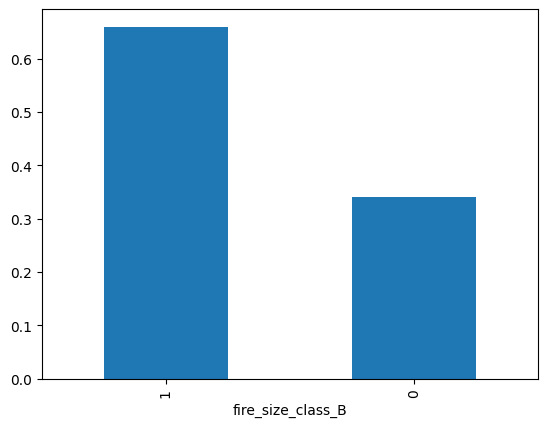

In [22]:
df.fire_size_class_B.value_counts(normalize=True).plot(kind='bar')

In [23]:
# Check for missing values
df.isnull().sum()

fire_size            0
fire_size_class      0
latitude             0
longitude            0
discovery_month      0
disc_pre_year        0
Vegetation           0
Temp_pre_30          0
Temp_pre_15          0
Temp_pre_7           0
Wind_pre_30          0
Wind_pre_15          0
Wind_pre_7           0
Hum_pre_30           0
Hum_pre_15           0
Hum_pre_7            0
Prec_pre_30          0
Prec_pre_15          0
Prec_pre_7           0
remoteness           0
fire_size_class_B    0
dtype: int64

In [24]:
df.dtypes



fire_size             float64
fire_size_class      category
latitude              float64
longitude             float64
discovery_month        object
disc_pre_year           int64
Vegetation              int64
Temp_pre_30           float64
Temp_pre_15           float64
Temp_pre_7            float64
Wind_pre_30           float64
Wind_pre_15           float64
Wind_pre_7            float64
Hum_pre_30            float64
Hum_pre_15            float64
Hum_pre_7             float64
Prec_pre_30           float64
Prec_pre_15           float64
Prec_pre_7            float64
remoteness            float64
fire_size_class_B       int64
dtype: object

In [25]:
df_2 = df[df["Wind_pre_30"] >= 0]
print(df_2.describe())
df_2.reset_index(drop=True, inplace=True)

           fire_size      latitude     longitude  disc_pre_year    Vegetation  \
count   41132.000000  41132.000000  41132.000000   41132.000000  41132.000000   
mean     2268.659983     36.459499    -95.776712    2004.740202     11.054362   
std     15178.186225      6.807528     15.958848       6.389088      5.580364   
min         0.510000     17.958364   -165.116700    1991.000000      0.000000   
25%         1.200000     32.353824   -104.435674    2000.000000      9.000000   
50%         4.000000     34.688619    -93.024989    2006.000000     12.000000   
75%        20.000000     39.729506    -83.699150    2010.000000     15.000000   
max    538049.000000     69.047200    -65.417709    2015.000000     16.000000   

        Temp_pre_30   Temp_pre_15    Temp_pre_7   Wind_pre_30   Wind_pre_15  \
count  41132.000000  41132.000000  41132.000000  41132.000000  41132.000000   
mean      14.733711     14.884784     15.028015      2.938778      2.828433   
std        9.156641      9.345450

/var/folders/z7/0999sht128s_z3s9njjhlzph0000gn/T/ipykernel_35209/642253691.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fire_size_class_B'] = df.fire_size_class.apply(lambda x: 1 if x == 'B' else 0)


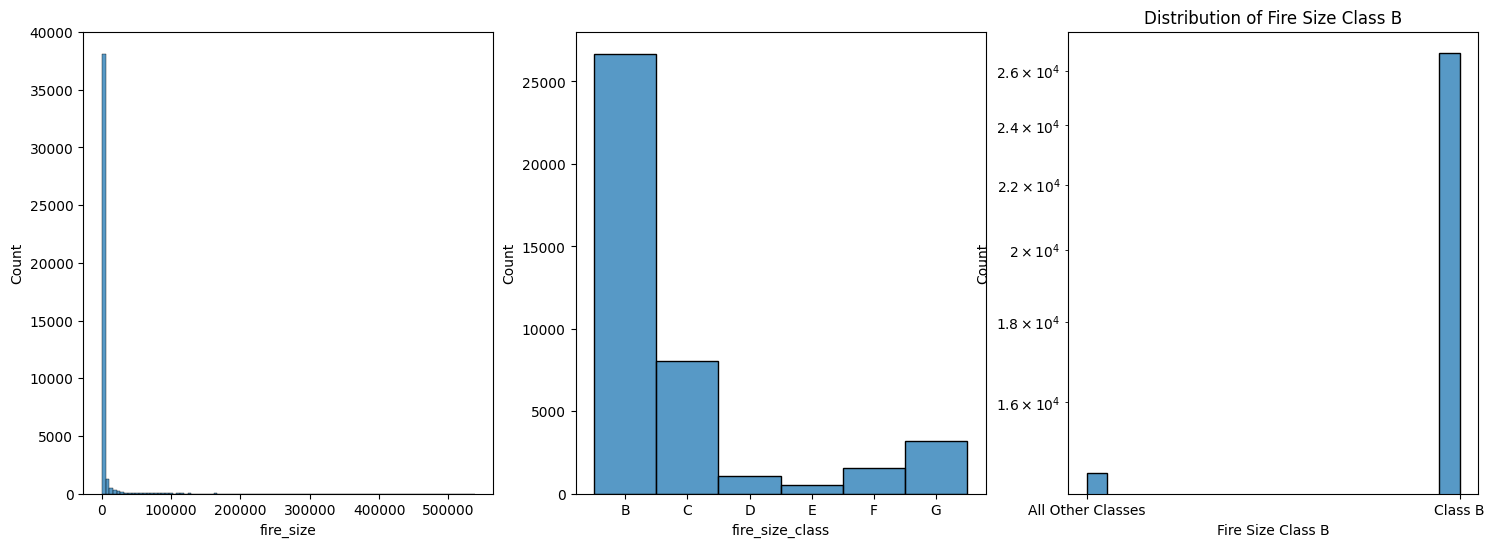

fire_size_class_B
1    26692
0    14440
Name: count, dtype: int64

In [26]:
plot_fire_dist_triple(df_2)
df_2.fire_size_class_B.value_counts()

In [27]:
df_2

,fire_size,fire_size_class,latitude,longitude,discovery_month,disc_pre_year,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,...,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,fire_size_class_B
0,10.0,C,18.105072,-66.753044,Feb,2007,12,24.480974,24.716923,24.902597,...,3.492857,3.262092,78.216590,76.793750,76.381579,0.0,0.0,0.0,0.017923,0
1,3.0,B,35.038330,-87.610000,Dec,2006,15,7.553433,7.010000,0.343529,...,2.881707,1.976471,70.840000,65.858911,55.505882,59.8,8.4,0.0,0.184355,1
2,60.0,C,34.947800,-88.722500,Feb,2004,16,4.971930,5.782766,5.558750,...,2.923830,2.695833,75.531629,75.868613,76.812834,168.8,42.2,18.1,0.194544,0
3,1.0,B,39.641400,-119.308300,Jun,2005,0,16.275967,18.996181,18.142564,...,3.398329,3.671282,44.778429,37.140811,35.353846,10.4,7.2,0.0,0.487447,1
4,5.2,B,31.316978,-83.393649,Jan,2008,12,14.877341,16.409326,0.000000,...,1.727202,0.000000,79.896679,73.431818,0.000000,26.0,0.0,0.0,0.148904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41127,3500.0,F,37.606667,-96.422500,Feb,2015,0,3.686132,3.039857,4.437563,...,5.694737,4.975000,62.971774,69.376658,68.118919,20.1,18.8,0.0,0.365622,0
41128,11699.0,G,40.394700,-104.564600,Sep,2015,14,19.845717,19.293642,18.678201,...,2.553364,2.638542,51.010341,50.264501,48.204861,4.6,0.0,0.0,0.199532,0
41129,6289.0,G,39.180000,-96.784167,Oct,2015,0,19.720799,16.891282,18.918994,...,2.705398,3.196648,65.671410,61.839572,54.625698,35.4,8.2,0.0,0.331501,0
41130,5702.0,G,37.262607,-119.511139,Jul,2015,0,28.425403,28.425403,28.166667,...,2.649395,2.667722,43.755556,43.755556,44.443975,0.0,0.0,0.0,0.097682,0


In [ ]:
temps = ["Temp_pre_30", "Temp_pre_15", "Temp_pre_7"]
winds = ["Wind_pre_30", "Wind_pre_15", "Wind_pre_7"]
hums = ["Hum_pre_30", "Hum_pre_15", "Hum_pre_7"]

weather_list = [temps, winds, hums]

def replace_missing_grouped_mean(df, group_list):
    df_copy = df.copy()
    #iterate over  rows
    for i, row in df_copy.iterrows():
        for o in weather_list:
            values = [row[o[0]], row[o[1]], row[o[2]]]
            id_zeros = [x == 0 for x in values]
            if  sum(id_zeros) == 3:
                #drop row from df with current index
                df_copy.drop(i, inplace=True)
                #continue to next row (here use break because we are in a nested loop)
                break
            elif sum(id_zeros) == 0:
                continue
            else:
                avg_nonzero = np.sum(values)/(len(values)-np.sum(id_zeros))
                values = [avg_nonzero if x == 0 else x for x in values]
                #update df_2 with new values
                df_copy.at[i, o[0]] = values[0]
                df_copy.at[i, o[1]] = values[1]
                df_copy.at[i, o[2]] = values[2] 
            
    return df_copy
    
df_3 = replace_missing_grouped_mean(df_2, weather_list).head()

,fire_size,fire_size_class,latitude,longitude,discovery_month,disc_pre_year,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,...,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,fire_size_class_B
0,10.0,C,18.105072,-66.753044,Feb,2007,12,24.480974,24.716923,24.902597,...,3.492857,3.262092,78.216590,76.793750,76.381579,0.0,0.0,0.0,0.017923,0
1,3.0,B,35.038330,-87.610000,Dec,2006,15,7.553433,7.010000,0.343529,...,2.881707,1.976471,70.840000,65.858911,55.505882,59.8,8.4,0.0,0.184355,1
2,60.0,C,34.947800,-88.722500,Feb,2004,16,4.971930,5.782766,5.558750,...,2.923830,2.695833,75.531629,75.868613,76.812834,168.8,42.2,18.1,0.194544,0
3,1.0,B,39.641400,-119.308300,Jun,2005,0,16.275967,18.996181,18.142564,...,3.398329,3.671282,44.778429,37.140811,35.353846,10.4,7.2,0.0,0.487447,1
4,5.2,B,31.316978,-83.393649,Jan,2008,12,14.877341,16.409326,15.643334,...,1.727202,1.863708,79.896679,73.431818,76.664249,26.0,0.0,0.0,0.148904,1


       fire_size fire_size_class   latitude   longitude discovery_month  \
0           10.0               C  18.105072  -66.753044             Feb   
1            3.0               B  35.038330  -87.610000             Dec   
2           60.0               C  34.947800  -88.722500             Feb   
3            1.0               B  39.641400 -119.308300             Jun   
4            5.2               B  31.316978  -83.393649             Jan   
...          ...             ...        ...         ...             ...   
41127     3500.0               F  37.606667  -96.422500             Feb   
41128    11699.0               G  40.394700 -104.564600             Sep   
41129     6289.0               G  39.180000  -96.784167             Oct   
41130     5702.0               G  37.262607 -119.511139             Jul   
41131    76067.0               G  38.843988 -122.759707             Sep   

       disc_pre_year  Vegetation  Temp_pre_30  Temp_pre_15  Temp_pre_7  ...  \
0               2007

In [33]:
display(df_3)
display(df_2)

,fire_size,fire_size_class,latitude,longitude,discovery_month,disc_pre_year,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,...,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,fire_size_class_B
0,10.0,C,18.105072,-66.753044,Feb,2007,12,24.480974,24.716923,24.902597,...,3.492857,3.262092,78.216590,76.793750,76.381579,0.0,0.0,0.0,0.017923,0
1,3.0,B,35.038330,-87.610000,Dec,2006,15,7.553433,7.010000,0.343529,...,2.881707,1.976471,70.840000,65.858911,55.505882,59.8,8.4,0.0,0.184355,1
2,60.0,C,34.947800,-88.722500,Feb,2004,16,4.971930,5.782766,5.558750,...,2.923830,2.695833,75.531629,75.868613,76.812834,168.8,42.2,18.1,0.194544,0
3,1.0,B,39.641400,-119.308300,Jun,2005,0,16.275967,18.996181,18.142564,...,3.398329,3.671282,44.778429,37.140811,35.353846,10.4,7.2,0.0,0.487447,1
4,5.2,B,31.316978,-83.393649,Jan,2008,12,14.877341,16.409326,15.643334,...,1.727202,1.863708,79.896679,73.431818,76.664249,26.0,0.0,0.0,0.148904,1


,fire_size,fire_size_class,latitude,longitude,discovery_month,disc_pre_year,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,...,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,fire_size_class_B
0,10.0,C,18.105072,-66.753044,Feb,2007,12,24.480974,24.716923,24.902597,...,3.492857,3.262092,78.216590,76.793750,76.381579,0.0,0.0,0.0,0.017923,0
1,3.0,B,35.038330,-87.610000,Dec,2006,15,7.553433,7.010000,0.343529,...,2.881707,1.976471,70.840000,65.858911,55.505882,59.8,8.4,0.0,0.184355,1
2,60.0,C,34.947800,-88.722500,Feb,2004,16,4.971930,5.782766,5.558750,...,2.923830,2.695833,75.531629,75.868613,76.812834,168.8,42.2,18.1,0.194544,0
3,1.0,B,39.641400,-119.308300,Jun,2005,0,16.275967,18.996181,18.142564,...,3.398329,3.671282,44.778429,37.140811,35.353846,10.4,7.2,0.0,0.487447,1
4,5.2,B,31.316978,-83.393649,Jan,2008,12,14.877341,16.409326,0.000000,...,1.727202,0.000000,79.896679,73.431818,0.000000,26.0,0.0,0.0,0.148904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41127,3500.0,F,37.606667,-96.422500,Feb,2015,0,3.686132,3.039857,4.437563,...,5.694737,4.975000,62.971774,69.376658,68.118919,20.1,18.8,0.0,0.365622,0
41128,11699.0,G,40.394700,-104.564600,Sep,2015,14,19.845717,19.293642,18.678201,...,2.553364,2.638542,51.010341,50.264501,48.204861,4.6,0.0,0.0,0.199532,0
41129,6289.0,G,39.180000,-96.784167,Oct,2015,0,19.720799,16.891282,18.918994,...,2.705398,3.196648,65.671410,61.839572,54.625698,35.4,8.2,0.0,0.331501,0
41130,5702.0,G,37.262607,-119.511139,Jul,2015,0,28.425403,28.425403,28.166667,...,2.649395,2.667722,43.755556,43.755556,44.443975,0.0,0.0,0.0,0.097682,0


In [ ]:
# drop all rows where a value is 0
df_test = df_2[df_2[temps].ne(0).all(axis=1)][temps]
df_test

,Temp_pre_30,Temp_pre_15,Temp_pre_7
0,24.480974,24.716923,24.902597
1,7.553433,7.010000,0.343529
2,4.971930,5.782766,5.558750
3,16.275967,18.996181,18.142564
5,16.851939,16.997783,20.434783
...,...,...,...
41127,3.686132,3.039857,4.437563
41128,19.845717,19.293642,18.678201
41129,19.720799,16.891282,18.918994
41130,28.425403,28.425403,28.166667


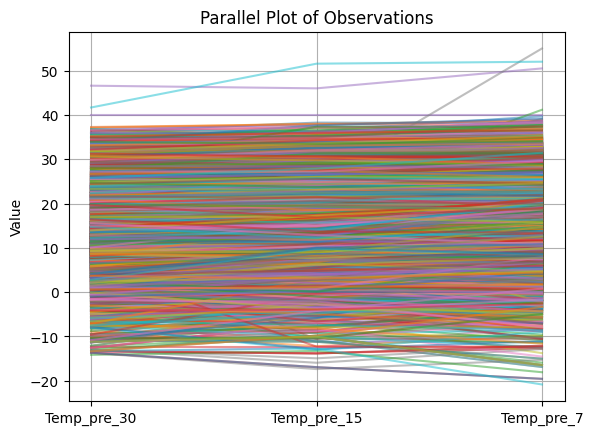

In [ ]:

df_test = df_2[df_2[temps].ne(0).all(axis=1)][temps]
# Plot all rows where the three values are connected with a line
for i in range(len(df_test)):
    plt.plot(df_test.columns, df_test.iloc[i], alpha=0.5)

plt.ylabel("Value")
plt.title("Parallel Plot of Observations")
plt.grid(True)
plt.show()

In [45]:
# For each row capture the index of the maximum value
max_indices = df_test.idxmax(axis=1)

max_indices.value_counts()

Temp_pre_7     18400
Temp_pre_30    10188
Temp_pre_15     7948
Name: count, dtype: int64